In [0]:
import json
import urllib.request as url
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
import numpy as np


In [0]:
response=url.urlopen("https://api.covid19india.org/raw_data.json")

temp_data=json.load(response)
data=pd.DataFrame(temp_data["raw_data"])

In [0]:
date=data["dateannounced"]
date=date.unique()
con=[]
for dt in date:
  count=1
  for dte in data["dateannounced"]:
    if dt==dte:
      count=count+1
  con.append(count)
  

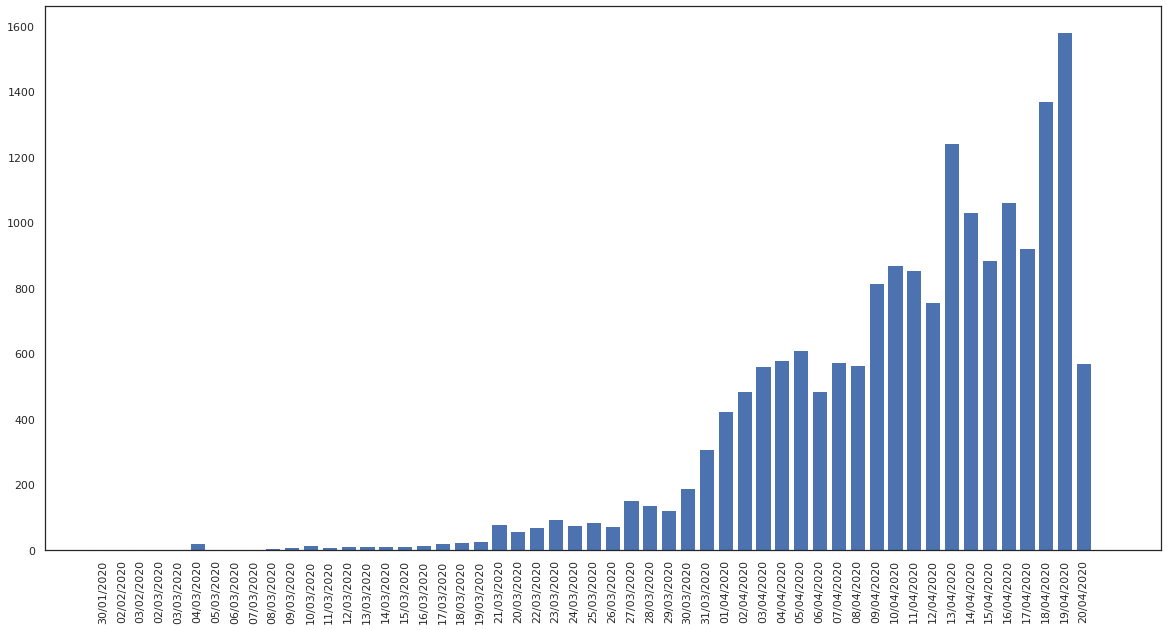

In [0]:
plt.figure(figsize=(20, 10))

act=plt.bar(date,con, width=.8)
plt.xticks(date, rotation='vertical')
plt.show()


In [0]:
response=url.urlopen("https://api.covid19india.org/deaths_recoveries.json")

temp_data=json.load(response)
dr=pd.DataFrame(temp_data["deaths_recoveries"])

In [0]:
date=dr["date"].unique()

death_data=dr[dr["patientstatus"]=="Deceased"]
recov_data=dr[dr["patientstatus"]=="Recovered"]


In [0]:
death_date=death_data["date"]
recov_date=recov_data["date"]

In [0]:
date=death_date.unique()
de=[]
for dt in date:
  count=1
  for dte in death_data["date"]:
    if dt==dte:
      count=count+1
  de.append(count)
  

In [0]:
date=recov_date.unique()
re=[]
for dt in date:
  count=1
  for dte in recov_data["date"]:
    if dt==dte:
      count=count+1
  re.append(count)

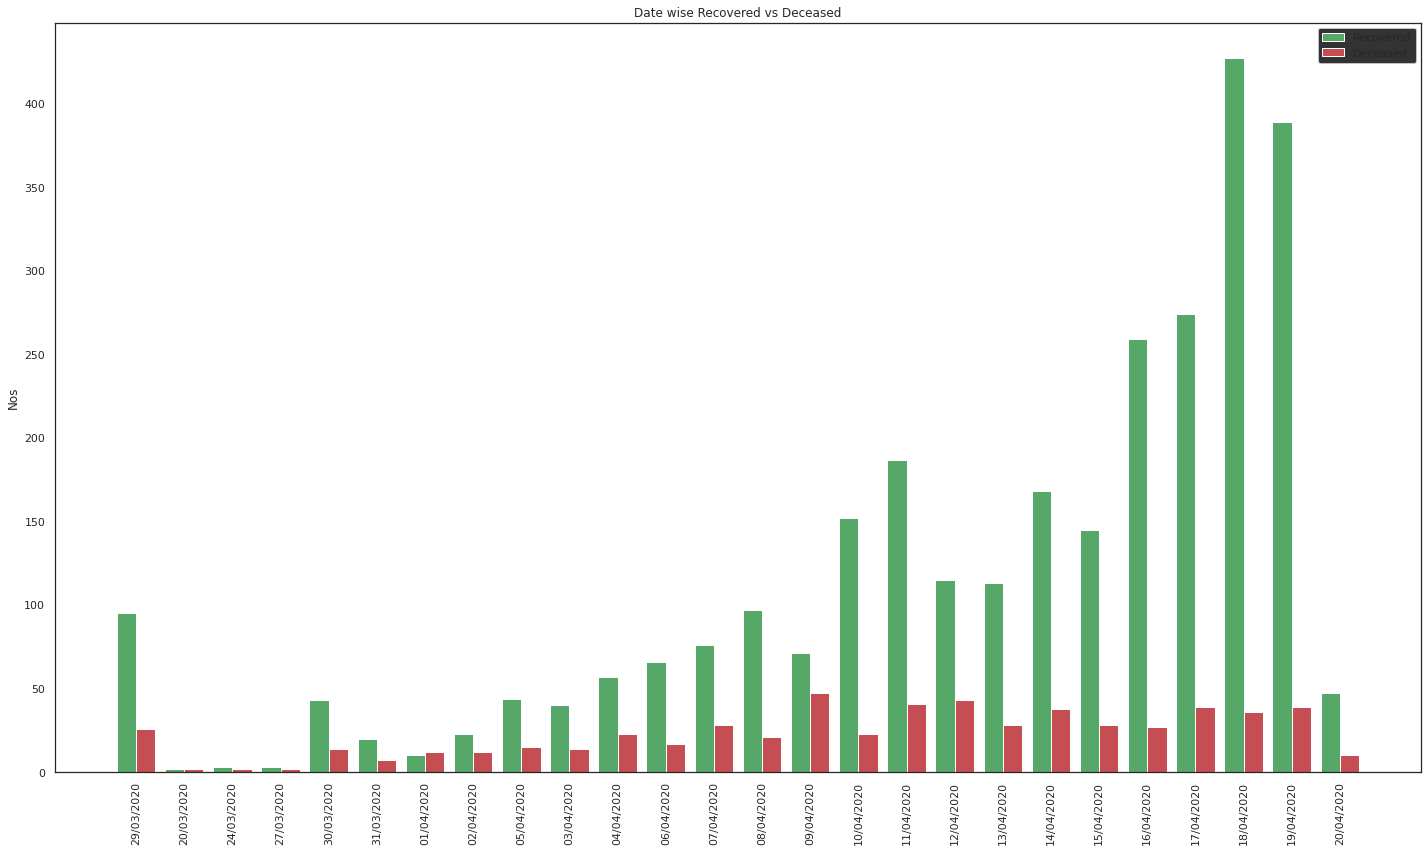

In [0]:
x = np.arange(len(date))  # the label locations
width = 0.4  # the width of the bars


fig, ax = plt.subplots(figsize=(20,12))
rects1 = ax.bar(x - width/2, re, width, label='Recovered', color="g")
rects2 = ax.bar(x + width/2, de, width, label='Deceased',color="r")

ax.set_ylabel('Nos')
ax.set_title('Date wise Recovered vs Deceased')
ax.set_xticks(x)
ax.set_xticklabels(date, rotation='vertical')
ax.legend()




fig.tight_layout()
plt.show()

In [0]:
response=url.urlopen("https://api.covid19india.org/data.json")

temp_data=json.load(response)
state=pd.DataFrame(temp_data["statewise"])

In [0]:
state.head()

,active,confirmed,deaths,deltaconfirmed,deltadeaths,deltarecovered,lastupdatedtime,recovered,state,statecode,statenotes
0,14406,17874,568,570,9,46,20/04/2020 14:04:05,2900,Total,TT,
1,3753,4483,223,283,0,0,19/04/2020 21:03:06,507,Maharashtra,MH,
2,1668,2003,45,0,0,0,19/04/2020 23:18:08,290,Delhi,DL,
3,1678,1851,67,108,4,1,19/04/2020 20:25:15,106,Gujarat,GJ,
4,1305,1535,25,57,2,0,20/04/2020 10:04:06,205,Rajasthan,RJ,


In [0]:

lab=state["state"]
conf=state["confirmed"]
recov=state["recovered"]
death=state["deaths"]
active=state["active"]

lab_data=conf.describe()



count     38
unique    31
top        0
freq       5
Name: confirmed, dtype: object

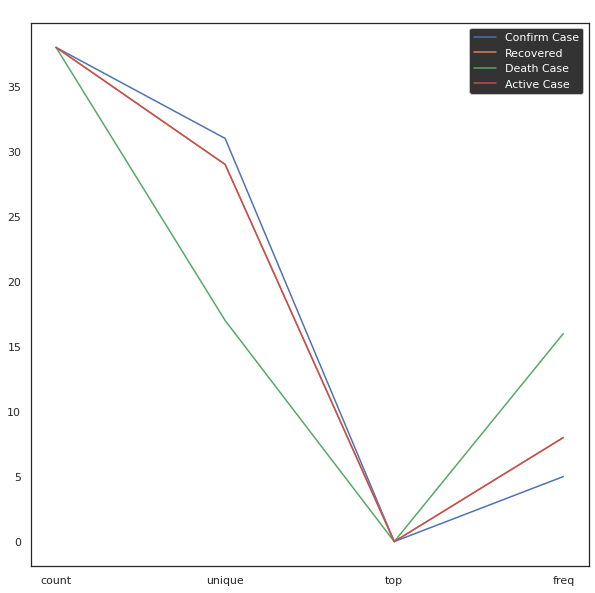

In [0]:
plt.figure(figsize=(10,10))
plt.plot(conf.describe(),label="Confirm Case")
plt.plot(recov.describe(),label="Recovered")
plt.plot(death.describe(),label="Death Case")
plt.plot(active.describe(),label="Active Case")
plt.title("Descriptive Analysis of Raw Data")
plt.legend()
plt.show()

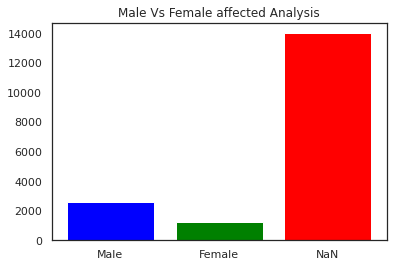

In [0]:
response=url.urlopen("https://api.covid19india.org/raw_data.json")
temp_data=json.load(response)
data=pd.DataFrame(temp_data["raw_data"])


#Comparing Male and Femele
female=data[data["gender"]=="F"]
male=data[data["gender"]=="M"]
tot=data["patientnumber"].count()
male_count=male["patientnumber"].count()
female_count=female["patientnumber"].count()
dat=["Male","Female","NaN"]
val=[male_count, female_count,tot-(male_count+female_count)]
plt.bar(dat,val,color=["blue","green","red"])
plt.title("Male Vs Female affected Analysis")
plt.show()


AttributeError: ignored

<Figure size 720x720 with 0 Axes>

[]

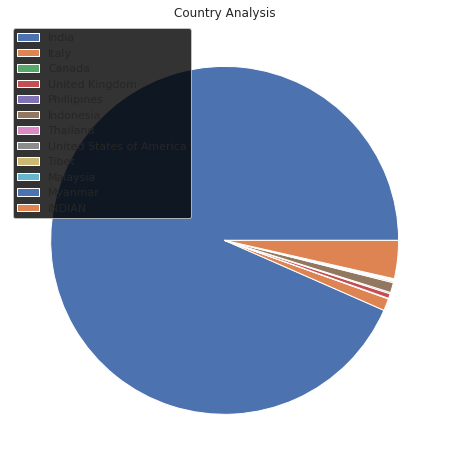

In [0]:

#Comparing Nationality
national=data["nationality"]
country=list(national.unique())
#country = [country for country in country if str(country) != 'nan']
country = list(filter(None,country))
country_count=[]
for cont in country:
    temp=data[data["nationality"]==cont]
    country_count.append(temp["patientnumber"].count())
#plt.figure(8,8)
fig= plt.figure(figsize=(8,8))

plt.pie(country_count)
plt.legend(country, loc="upper left")
plt.title("Country Analysis")
plt.plot()


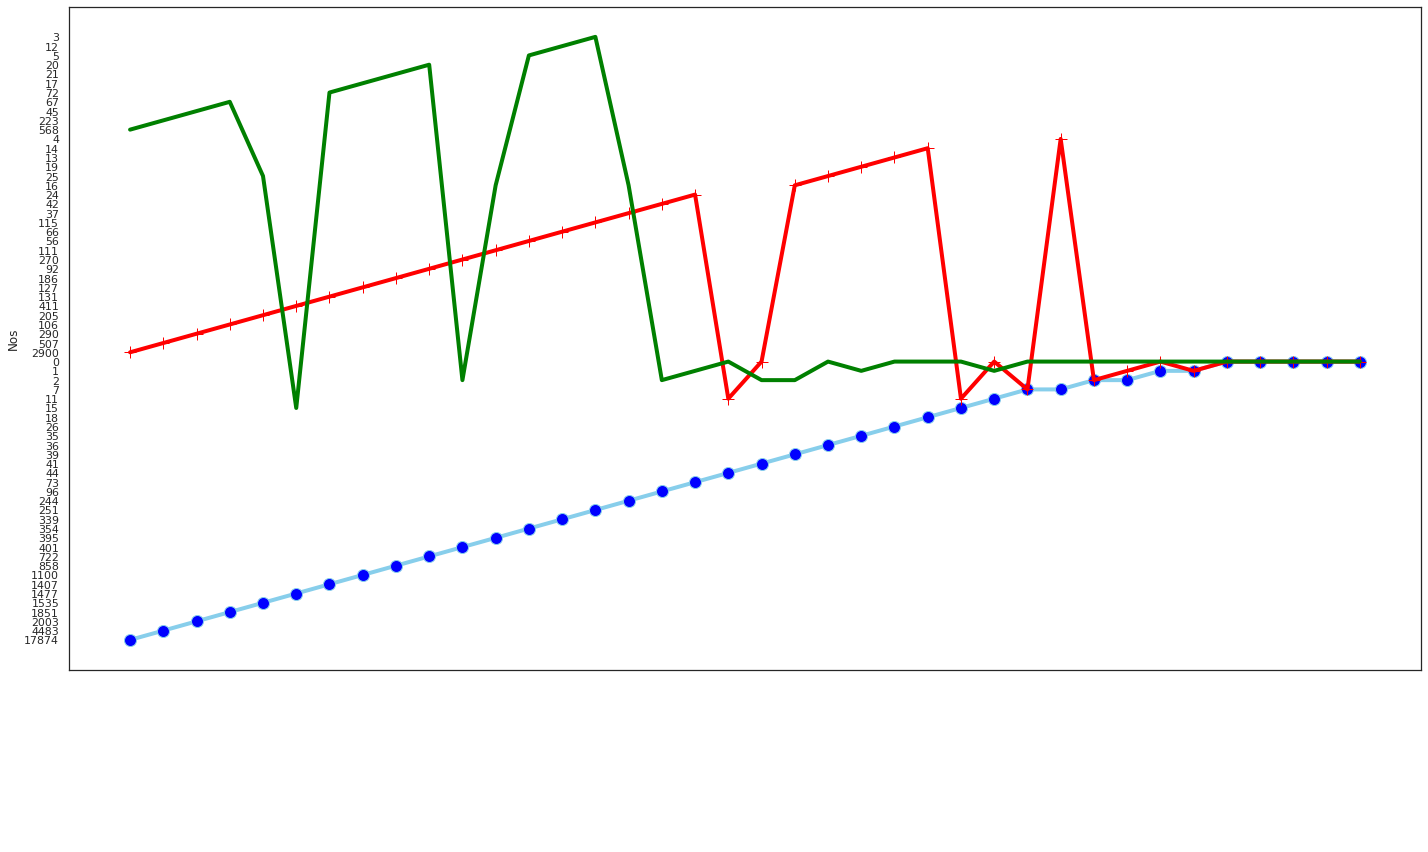

In [0]:
fig, ax = plt.subplots(figsize=(20,12))
plt.plot(conf, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot(recov, marker='+', markerfacecolor='blue', markersize=12, color='red', linewidth=4)
plt.plot(death, marker='', markerfacecolor='blue', markersize=12, color='green', linewidth=4)
ax.set_xticks(x)
ax.set_xticklabels(lab, rotation='vertical',color="w")
plt.ylabel('Nos')

fig.tight_layout()
plt.show()

Text(0.5, 1.0, 'Over All Data of COVID-19 in INDIA')

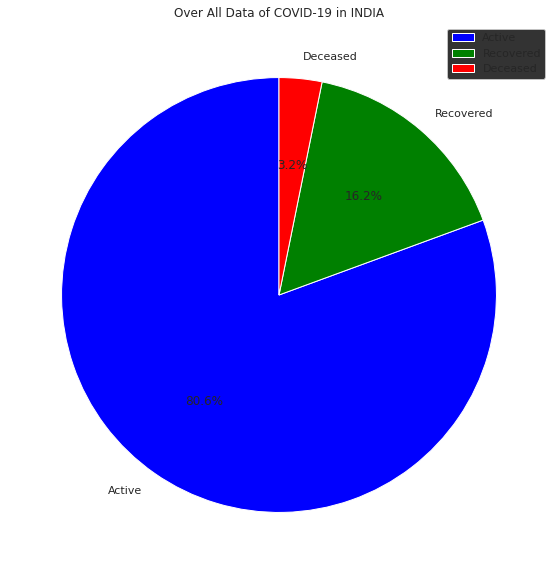

In [0]:
tot_data=[active[0],recov[0],death[0]]
lab=["Active","Recovered", "Deceased"]
col=["blue","green","red"]
explode = (0, 0.1, 0, 0)
plt.figure(figsize=(10,10))
plt.pie(tot_data, labels=lab, autopct='%1.1f%%', startangle=90, colors=col)
plt.legend()
plt.title("Over All Data of COVID-19 in INDIA")

In [0]:
response=url.urlopen("https://api.covid19india.org/data.json")

temp_data=json.load(response)
state=pd.DataFrame(temp_data["statewise"])


,active,confirmed,deaths,deltaconfirmed,deltadeaths,deltarecovered,lastupdatedtime,recovered,state,statecode,statenotes
0,14406,17874,568,570,9,46,20/04/2020 14:04:05,2900,Total,TT,
1,3753,4483,223,283,0,0,19/04/2020 21:03:06,507,Maharashtra,MH,
2,1668,2003,45,0,0,0,19/04/2020 23:18:08,290,Delhi,DL,
3,1678,1851,67,108,4,1,19/04/2020 20:25:15,106,Gujarat,GJ,
4,1305,1535,25,57,2,0,20/04/2020 10:04:06,205,Rajasthan,RJ,
5,1051,1477,15,0,0,0,19/04/2020 18:44:11,411,Tamil Nadu,TN,
6,1204,1407,72,0,0,0,19/04/2020 19:59:06,131,Madhya Pradesh,MP,
7,956,1100,17,0,0,0,20/04/2020 01:09:12,127,Uttar Pradesh,UP,
8,651,858,21,0,0,0,19/04/2020 21:23:08,186,Telangana,TG,
9,610,722,20,75,3,27,19/04/2020 15:35:05,92,Andhra Pradesh,AP,


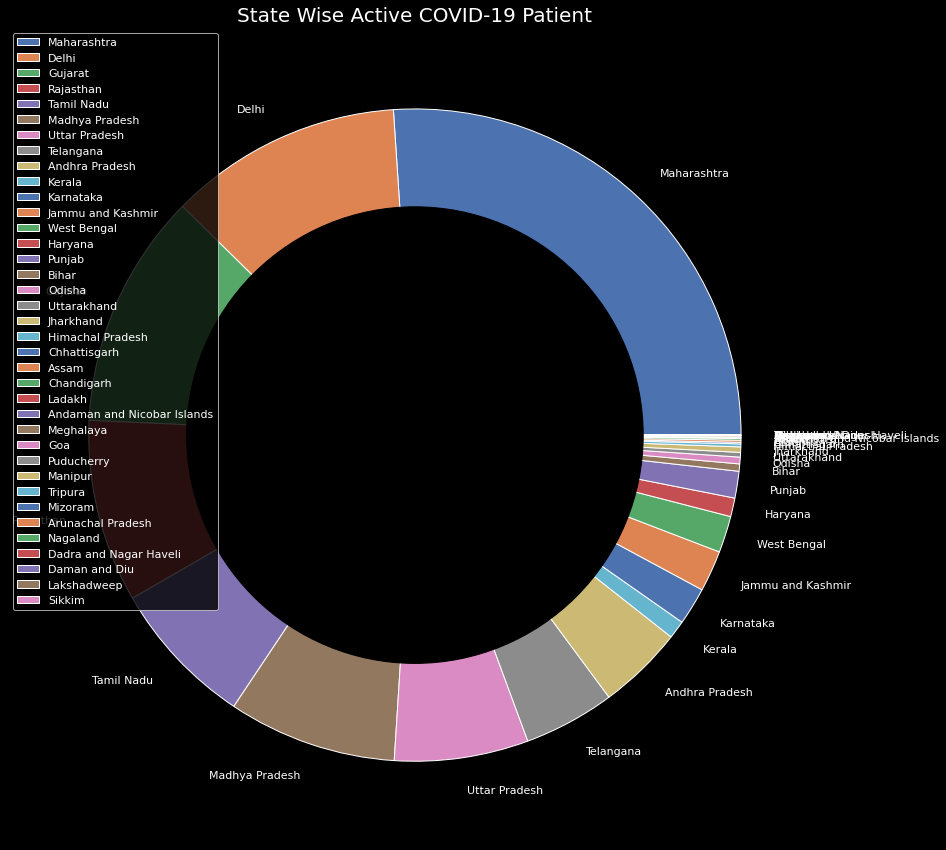

In [0]:
data=state["active"]
data=data[1:]
lab=state["state"]
lab=lab[1:]
 
# create a figure and set different background
fig = plt.figure(figsize=(20,15))
fig.patch.set_facecolor('black')
 
# Change color of text
plt.rcParams['text.color'] = 'white'
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='black')
 
# Pieplot + circle on it
plt.pie(data, labels=lab)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.title("State Wise Active COVID-19 Patient", color="w",fontsize=20)
plt.show()



In [0]:
response=url.urlopen("https://api.covid19india.org/data.json")

temp_data=json.load(response)
state=pd.DataFrame(temp_data["statewise"])
lab=state["state"]
conf=state["confirmed"]
recov=state["recovered"]
death=state["deaths"]
active=state["active"]

df = pd.DataFrame({
'conf': conf,
'recov': recov,
'death': death,
'active': active

})
import plotly.express as px
import pandas as pd
for i in range(0, len(df.index)):
  df = pd.DataFrame(dict(
    r=[conf[i],active[i],recov[i],death[i]],
    theta=['Confirmed Case','Active Case','Recovered',
           'Deceased']))
  fig=px.line_polar(df, r='r', theta='theta', line_close=True)
  fig.update_layout(
    title = lab[i],
    showlegend = True
)
  fig.show()
